In [1]:
# Load required libraries
from cerebralcortex.core.data_manager.raw.stream_handler import DataSet
from cerebralcortex.cerebralcortex import CerebralCortex
from cerebralcortex.core.datatypes.datastream import DataStream
from cerebralcortex.core.datatypes.datastream import DataPoint
import matplotlib.pyplot as plt
import uuid

In [2]:
# Load CerebralCortex Configurations
CC = CerebralCortex("../cc_config_file/cc_vagrant_configuration.yml")
#print(CC)

In [3]:
# Get all users for study name "Demo"
user_ids = CC.get_all_users("demo")

# get only one participant's ID
participant_id = user_ids[0]["identifier"]

# Print only first user's identifier
print("Owner ID: {}".format(participant_id))

Owner ID: 636fcc1f-8966-4e63-a9df-0cbaa6e9296c


In [4]:
# Get all the streams of a user
user_streams = CC.get_user_streams(participant_id)

# Print all the stream names and identifiers
for key,val in user_streams.items():
    print("{} = {}, {}\n".format(key, val["name"], val["identifier"]))


STEP_COUNT_SUMMARY_HOUR--org.md2k.mcerebrum--PHONE = STEP_COUNT_SUMMARY_HOUR--org.md2k.mcerebrum--PHONE, 4d7614f0-ca6a-3466-aa00-efb3b84b2ae0

STEP_COUNT--org.md2k.mcerebrum--PHONE = STEP_COUNT--org.md2k.mcerebrum--PHONE, 27a46e61-916b-38cd-b02e-6c551f4bd03e

DATA_QUALITY_SUMMARY_HOUR--ACCELEROMETER--org.md2k.motionsense--MOTION_SENSE_HRV_PLUS--RIGHT_WRIST = DATA_QUALITY_SUMMARY_HOUR--ACCELEROMETER--org.md2k.motionsense--MOTION_SENSE_HRV_PLUS--RIGHT_WRIST, 29870521-1617-3689-9058-f649ac3c887c

DATA_QUALITY_SUMMARY_DAY--ACCELEROMETER--org.md2k.motionsense--MOTION_SENSE_HRV_PLUS--LEFT_WRIST = DATA_QUALITY_SUMMARY_DAY--ACCELEROMETER--org.md2k.motionsense--MOTION_SENSE_HRV_PLUS--LEFT_WRIST, 7f99b7d4-62c2-3d10-8104-9b75e3607c67

BATTERY--org.md2k.mcerebrum--PHONE = BATTERY--org.md2k.mcerebrum--PHONE, c1208a0e-2ebd-3a50-9738-1c496e8ab5ab

LOCATION--org.md2k.mcerebrum--PHONE = LOCATION--org.md2k.mcerebrum--PHONE, 019c2d56-62c6-36b2-9247-205312775ccb

DATA_QUALITY_SUMMARY_HOUR--LED--org.md2k.m

/opt/conda/lib/python3.6/site-packages/MD2K_Cerebral_Cortex-2.2.2-py3.6.egg/cerebralcortex/cerebralcortex.py:189: DeprecationWarning: PLEASE USE stream_ids KEY IN DICT OBJECT TO GET ALL STREAM IDS OF A STREAM NAME. Identifier key will be removed in CerebralCortex version 2.2.4.
  warnings.warn("PLEASE USE stream_ids KEY IN DICT OBJECT TO GET ALL STREAM IDS OF A STREAM NAME. Identifier key will be removed in CerebralCortex version 2.2.4.", DeprecationWarning)


In [5]:
# Get stream ID of a stream name (BATTERY--org.md2k.mcerebrum--PHONE)
stream_ids = CC.get_stream_id(participant_id, "BATTERY--org.md2k.mcerebrum--PHONE")

if len(stream_ids)>0:
    #get only one stream ID
    stream_id = stream_ids[0]["identifier"]
    print(stream_id)
    # Get stream (BATTERY--org.md2k.phonesensor--PHONE = BATTERY--org.md2k.phonesensor--PHONE) days when data is available
    stream_days = CC.get_stream_days(stream_id)

    # Print stream (BATTERY--org.md2k.phonesensor--PHONE = BATTERY--org.md2k.phonesensor--PHONE) days
    print("Stream Days {}".format(stream_days))
else:
    print("No stream found")

c1208a0e-2ebd-3a50-9738-1c496e8ab5ab
Stream Days ['20180530']


In [6]:
# Get data stream of a user for a particular day
# stream name BATTERY--org.md2k.phonesensor--PHONE = BATTERY--org.md2k.phonesensor--PHONE
ds = CC.get_stream(stream_id, participant_id, stream_days[0])

# Print data stream's data descriptor
print("Stream Data Descriptor" ,ds.data_descriptor)

# Please have a look at all the properties of data stream at: https://github.com/MD2Korg/CerebralCortex/blob/master/cerebralcortex/core/datatypes/datastream.py

Stream Data Descriptor [{'NAME': 'Level', 'UNIT': 'percentage', 'DATA_TYPE': 'float', 'FREQUENCY': '1.0', 'MAX_VALUE': '100', 'MIN_VALUE': '0', 'DESCRIPTION': 'current battery charge'}, {'NAME': 'Voltage', 'UNIT': 'voltage', 'DATA_TYPE': 'float', 'FREQUENCY': '1.0', 'MAX_VALUE': '5000', 'MIN_VALUE': '0', 'DESCRIPTION': 'current battery voltage level'}, {'NAME': 'Temperature', 'UNIT': 'celsius', 'DATA_TYPE': 'float', 'FREQUENCY': '1.0', 'MAX_VALUE': '100', 'MIN_VALUE': '-50', 'DESCRIPTION': 'current battery temperature'}]


In [10]:
# Print only only first 5 data points of a stream
ds.data[:5]

[DataPoint(2018-05-30 18:33:00.645000+00:00, None, -21600000, [83.0, 4152.0, 253.0]),
 DataPoint(2018-05-30 18:33:01.648000+00:00, None, -21600000, [83.0, 4152.0, 253.0]),
 DataPoint(2018-05-30 18:33:02.652000+00:00, None, -21600000, [83.0, 4152.0, 253.0]),
 DataPoint(2018-05-30 18:33:03.656000+00:00, None, -21600000, [83.0, 4152.0, 253.0]),
 DataPoint(2018-05-30 18:33:04.659000+00:00, None, -21600000, [83.0, 4152.0, 253.0])]

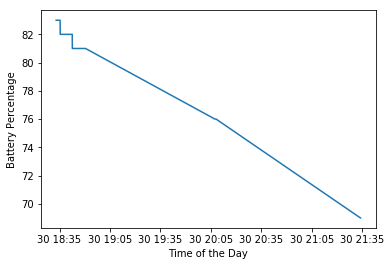

In [8]:
# Plot data stream

battery = []
day_time = []
for dp in ds.data:
    battery.append(dp.sample[0])
    day_time.append(dp.start_time)

plt.plot(day_time,battery)
plt.ylabel('Battery Percentage')
plt.xlabel('Time of the Day')
plt.show()    